### AI-Powered Maintenance System for OEM(Original Equipment manufacturers)

 - **Problem Statement:**

 The current vehicle maintenance model operates on either scheduled or reactive maintenance. In scheduled maintenance, vehicles are serviced after a fixed period, regardless of the actual condition of the vehicle parts. This leads to inefficiencies such as replacing parts too early or missing critical failures, resulting in unexpected breakdowns. Reactive maintenance, where repairs happen only after something has failed, often leads to higher repair costs, vehicle downtime, and customer dissatisfaction.

- **Original Equipment Manufacturers (OEMs)** are seeking innovative methods to overcome these challenges by predicting and preventing vehicle failures before they occur. The goal is to minimize unscheduled repairs, reduce maintenance costs, and improve vehicle reliability, safety, and overall customer satisfaction.

**Work-flow of the project**

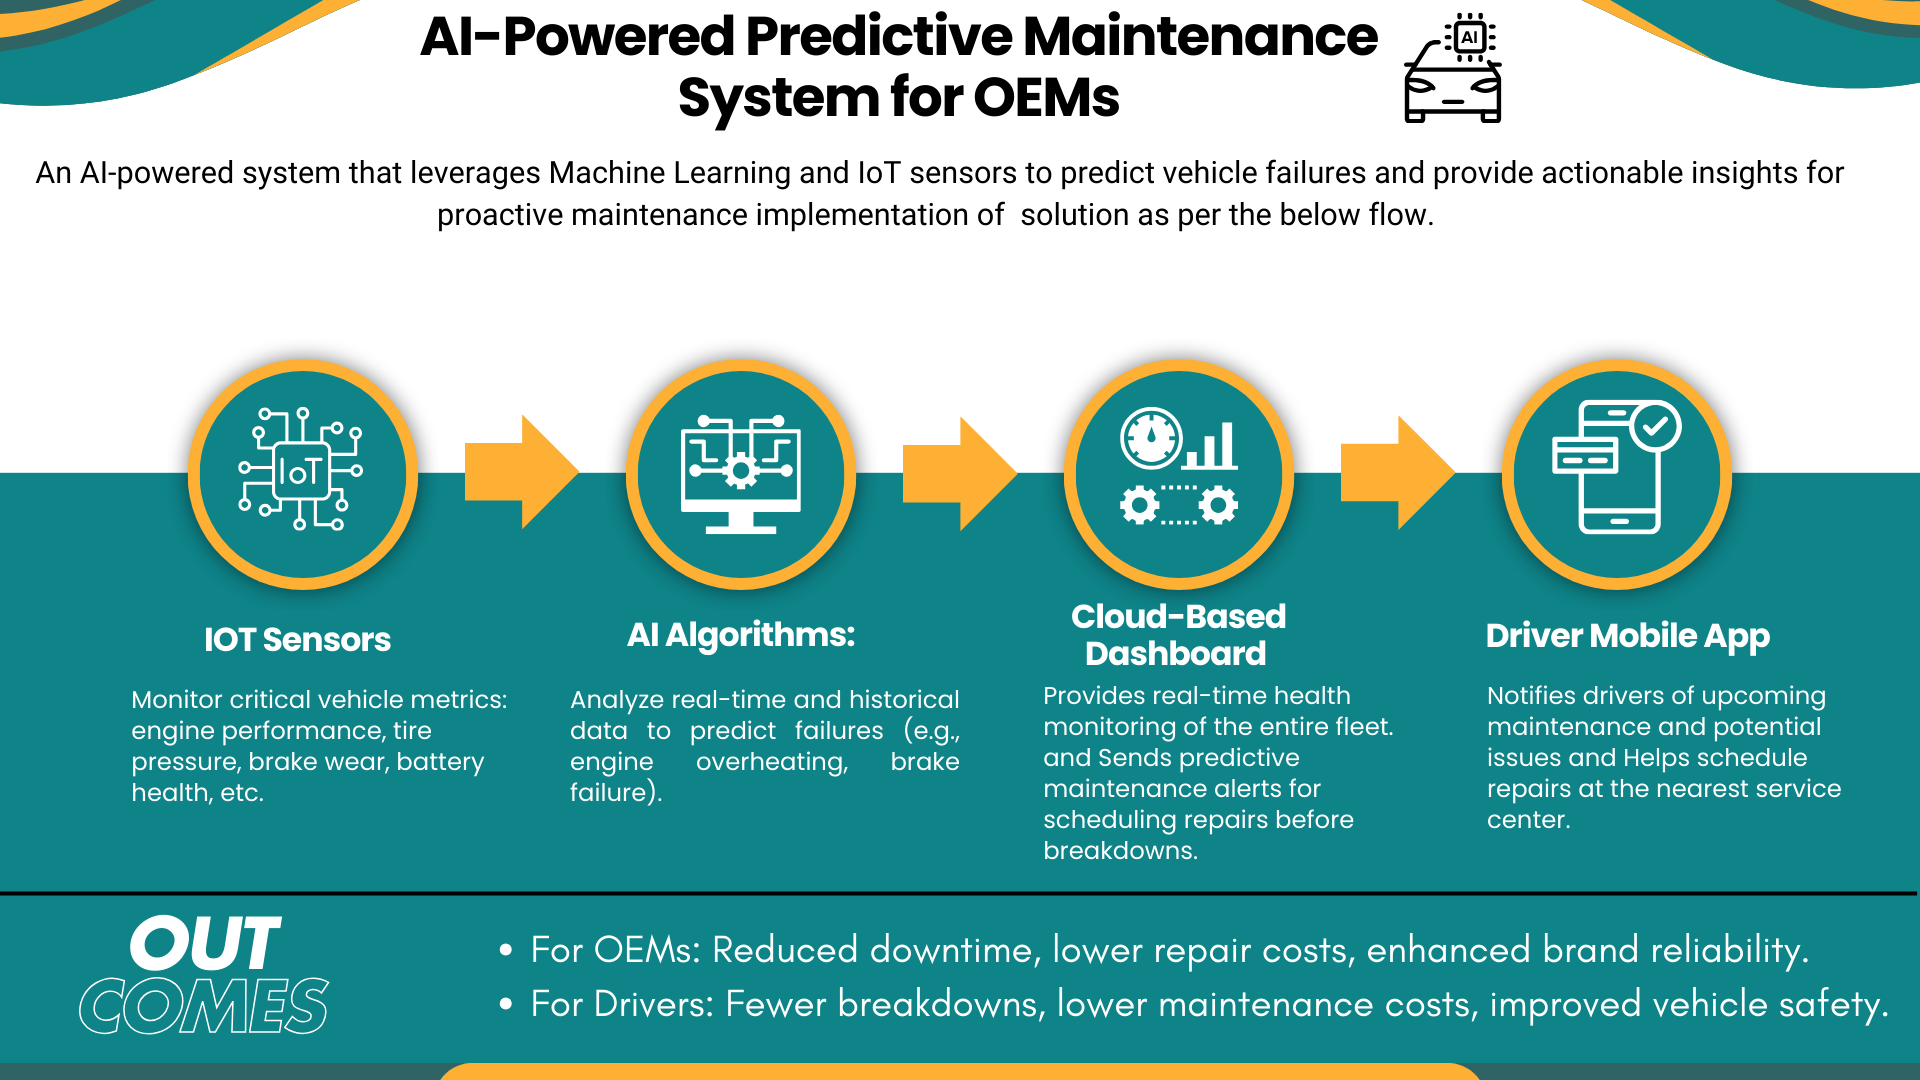

**Briefing on the basic phases of development**

- The project is divided into several phases

**Phase - 1 (Data collection, processing and Model development)**
- Data collection and processing (sensor data)
- Algorithm selection and Model Training
Model Tuning, Optimization, performance evaluation

**phase-2 (Cloud Integration, Data pipeline, Model Integration and MLOPS)**
- Review the results and improve performance
- Cloud integration
- Developing a data pipeline with the continous data from the vehicle fleet app.

**phase -3 (Fleet system & Mobile app to cloud integration)**

- Driver and Fleet App Development
- Cloud integration with app
- Activating notifications

**Final phase(Review)**

**Note :** This jupyter notebook **file contains the details of the phase-1 work** along with data sources(includes collection), preprocessing, Model building, Evaluation, Tuning and model optimiazation.

### Data collection

**About Dataset :** Its hard to get a realtime data of vehicles  from the Internet hence we dont have any access to such data we have decided  to get the data from kaggle this data are seems real and very accurate to the real world generated data.

The dataset contains following columns:
- ---  ------            --------------  -----  
- 0   Engine rpm       
- 1   Lub oil pressure
-  2   Fuel pressure     
- 3   Coolant pressure
- 4   lub oil temp      
- 5   Coolant temp     
- 6   Engine Condition  

In [3]:
#Importing all the neccessary libraries

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Random values generation
import random
from datetime import datetime, timedelta

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# For saving the model
import joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/pm/engine_data.csv')
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


### Data exploration and preproceesing

In [ ]:
# Data Exploration
print(df.info())  # Get data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB
None


In [ ]:
# Summary statistics for numerical features
print(df.describe())

         Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
count  19535.000000      19535.000000   19535.000000      19535.000000   
mean     791.239263          3.303775       6.655615          2.335369   
std      267.611193          1.021643       2.761021          1.036382   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518815       4.916886          1.600466   
50%      746.000000          3.162035       6.201720          2.166883   
75%      934.000000          4.055272       7.744973          2.848840   
max     2239.000000          7.265566      21.138326          7.478505   

       lub oil temp  Coolant temp  Engine Condition  
count  19535.000000  19535.000000      19535.000000  
mean      77.643420     78.427433          0.630509  
std        3.110984      6.206749          0.482679  
min       71.321974     61.673325          0.000000  
25%       75.725990     73.895421          0.000000  
50%      

In [ ]:
# Count missing values in each column
print(df.isnull().sum())

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64


There are No Null values are present in the dataset

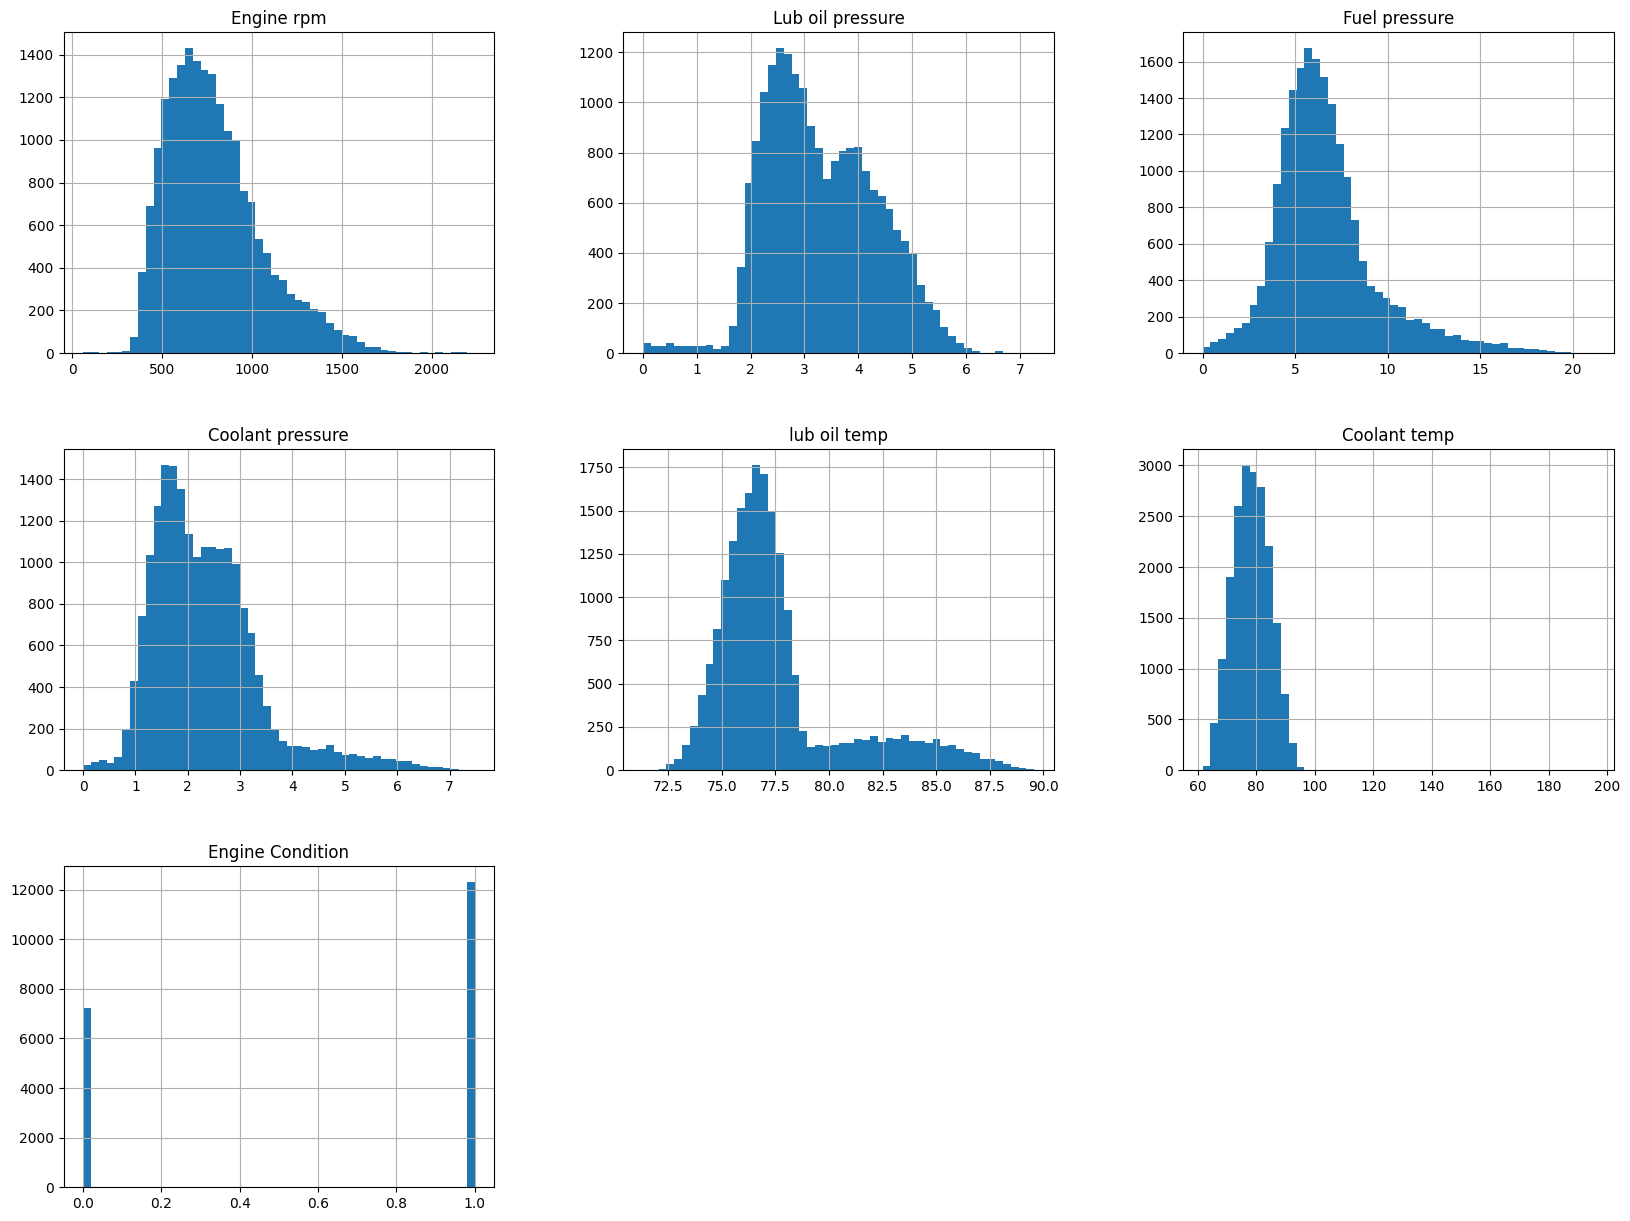

In [ ]:
numerical_df = df[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp','Coolant temp','Engine Condition']]

# Plot histograms for the selected numerical features
numerical_df.hist(bins=50, figsize=(20, 15))
plt.show()

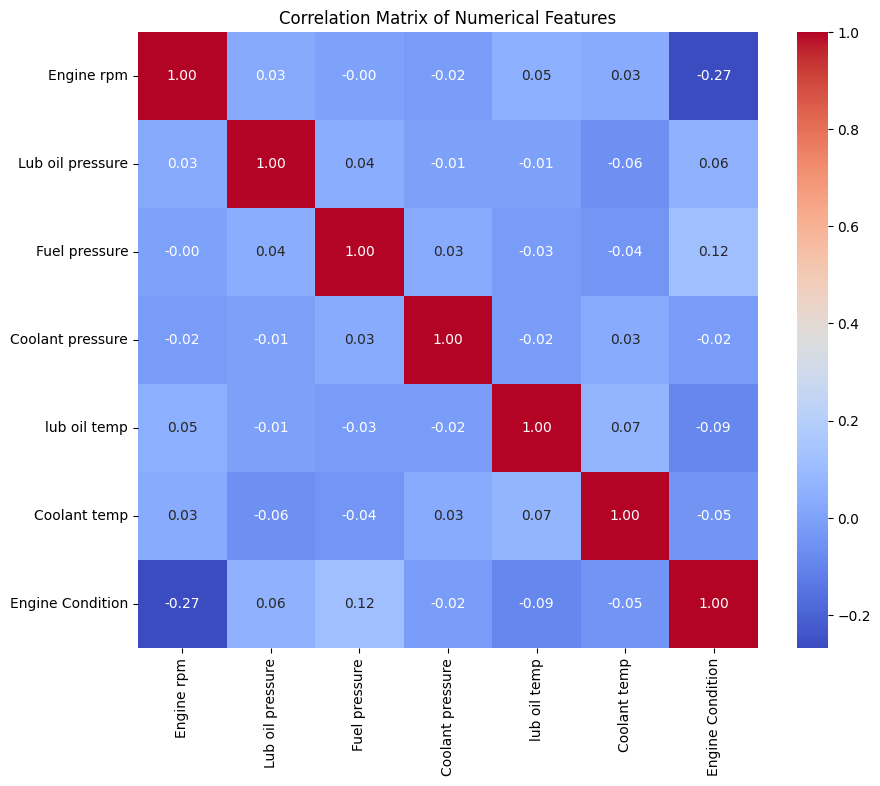

In [ ]:
#co relation matrix for the data
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

This correlation matrix visualizes the relationships between various numerical features related to engine parameters and the engine condition.

**Engine rpm vs. Engine Condition:** There is a moderate negative correlation (-0.27) between engine rpm and engine condition. This indicates that as engine rpm increases, engine condition might deteriorate, or vice versa.

**Lub Oil Pressure:** This has a weak positive correlation with engine condition (0.06). This suggests that higher lubricating oil pressure slightly relates to better engine condition, but the effect is minimal.

**Fuel Pressure vs. Engine Condition:** There’s a weak positive correlation (0.12), indicating that higher fuel pressure is slightly associated with better engine condition.

**Coolant Pressure, Lub Oil Temp, Coolant Temp**: These features have very weak or near-zero correlations with engine condition, suggesting they do not have a strong linear relationship with it.

**Internal Correlations:**

**Lub oil temp and coolant temp have a weak positive correlation (0.07).**
Other feature pairs like fuel pressure and coolant pressure, or lub oil pressure and coolant temp, have minimal correlations, indicating minimal linear interdependence between them.
In summary**, none of the features exhibit a strong linear relationship with engine condition, but engine rpm has the most notable effect**, albeit moderately negative.

There is no co-relation with any pair in the dataset


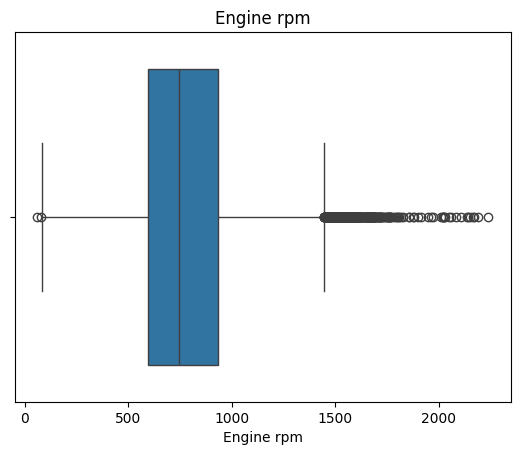

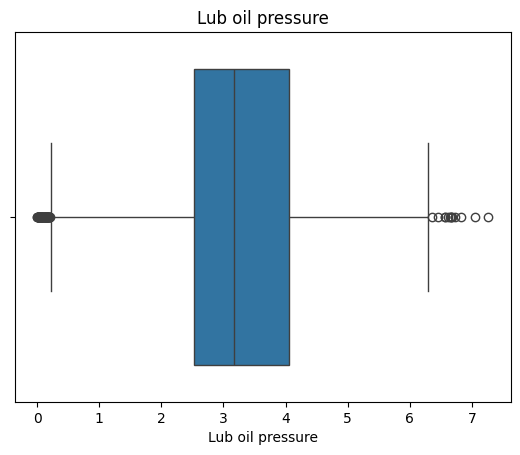

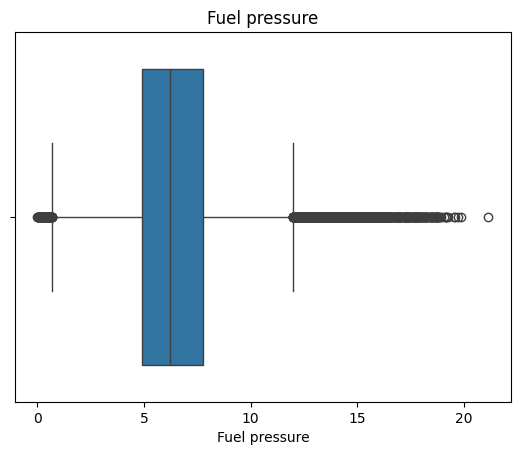

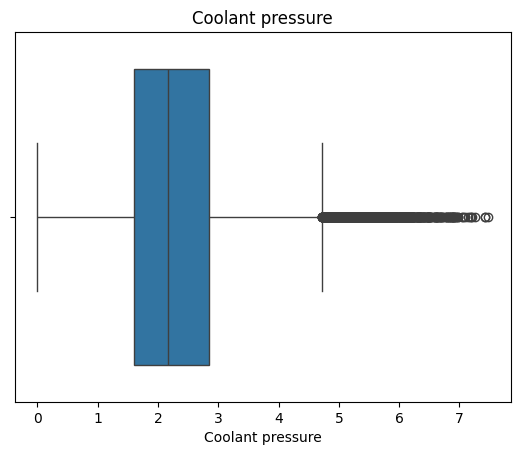

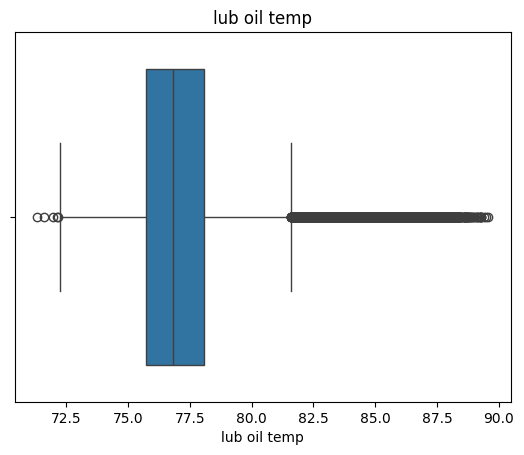

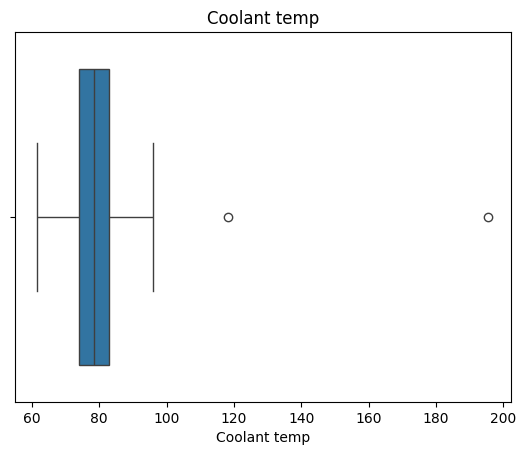

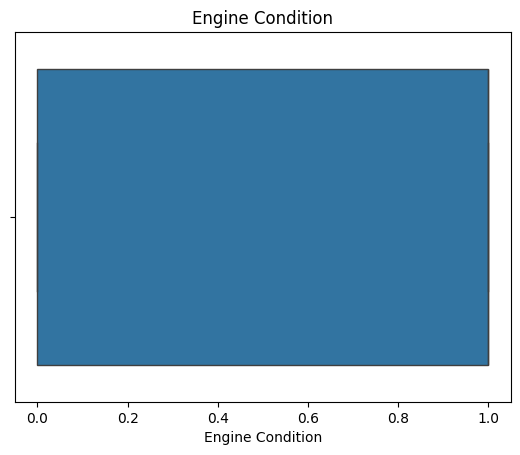

In [ ]:
# Box plots to identify outliers
for column in df.select_dtypes(include=np.number):
  plt.figure()
  sns.boxplot(x=df[column])
  plt.title(column)
  plt.show()

In [ ]:

def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Example usage
for column in df.columns:
    outlier_count = count_outliers(df, column)
    print(f"{column}: {outlier_count} outliers")

Engine rpm: 464 outliers
Lub oil pressure: 66 outliers
Fuel pressure: 1135 outliers
Coolant pressure: 785 outliers
lub oil temp: 2617 outliers
Coolant temp: 2 outliers
Engine Condition: 0 outliers


The presence of outliers can affect  data analysis and modeling in several ways, especially in terms of metrics, model performance, and feature relationships.

Engine rpm (464 outliers):

The moderate number of outliers in engine rpm may influence its correlation with engine condition. If these high rpm values represent extreme or abnormal operating conditions, they could skew the correlation calculation, making the relationship seem stronger or weaker than it might be in regular conditions.
Lub oil pressure (66 outliers):

A small number of outliers here suggests limited impact on overall analysis. However, outliers in lub oil pressure, particularly if they represent either very low or high values, could slightly skew mean or median-based analyses and potentially affect machine learning models sensitive to these values.
Fuel pressure (1135 outliers):

With a high count of outliers, fuel pressure may significantly impact any statistical analyses. Such a large number of outliers could indicate either measurement anomalies or naturally occurring fluctuations. Either way, they may dilute the predictive power of fuel pressure as a feature.
Coolant pressure (785 outliers):

This relatively large number of outliers may indicate abnormal or edge-case readings in the coolant system. This could affect models that depend on coolant pressure as a feature and could introduce noise if these outliers are not meaningful in a predictive context.
Lub oil temp (2617 outliers):

The large number of outliers in lub oil temperature could suggest data quality issues, such as sensor malfunctions or misreadings, or represent genuine extreme values. These outliers might heavily distort both statistical and predictive analyses, impacting correlation and possibly creating misleading relationships with other features.
Coolant temp (2 outliers):

The very low number of outliers suggests that coolant temperature data is mostly stable and unaffected by anomalies. These two outliers likely have minimal impact on the analysis.
Engine Condition (0 outliers):


Overall Impact:
Correlation Matrix: The presence of significant outliers, particularly in features like fuel pressure and lub oil temperature, could weaken or misrepresent correlations. Outliers may distort the correlation values, making relationships seem weaker or stronger than they are under normal operating conditions.
Statistical Analyses and Modeling: Outliers, especially in high quantities, can influence machine learning models, especially those sensitive to extreme values like linear regression. If these outliers are noise rather than true extreme conditions, you may want to consider handling them through outlier removal or transformation.

In [20]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_over[numeric_cols] = scaler.fit_transform(X_over[numeric_cols])


#Model training

In [7]:
# Import necessary libraries
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Define the features (X) and target (y) for the engine dataset
X = df.drop(['Engine Condition'], axis=1)
y = df['Engine Condition']

# Perform random oversampling on the minority class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X, y)

# Initialize the StandardScaler for numeric columns in the engine dataset
scaler = StandardScaler()

# List of numeric columns to scale
numeric_cols = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']

# Scale the numeric attributes in the oversampled dataset
X_over[numeric_cols] = scaler.fit_transform(X_over[numeric_cols])

# Display the transformed dataset
print(X_over.head())
print(y_over.value_counts())


   Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0   -0.410247         -0.778477       1.899046          0.791897   
1    0.235070         -0.338681       3.500457          0.113866   
2   -1.070231         -0.318911      -0.006010         -1.214867   
3   -1.242560          0.413494       4.706646          1.312393   
4   -0.707240          2.342534       3.334969         -0.277357   

   lub oil temp  Coolant temp  
0      2.064406      0.506060  
1     -0.019392      0.638255  
2      0.016282      0.183279  
3     -1.144413     -1.095738  
4      0.222867      1.378336  
Engine Condition
1    12317
0    12317
Name: count, dtype: int64


**Creating a 80-20 Test split**

In [8]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)


# DecisionTreeClassifier

Accuracy: 0.7213314390095392
Precision: 0.757929104477612
Recall: 0.6555062525211779
F1 Score: 0.7030067056024226
MCC: 0.44726521464692287
FPR: [0.        0.2120098 1.       ]
FNR: 0.3444937474788221
NLR: 0.4371802456340884
Confusion Matrix:
 [[1929  519]
 [ 854 1625]]


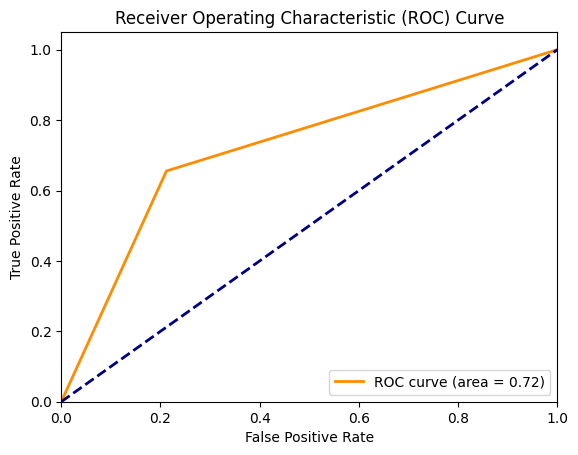

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate False Positive Rate (FPR), False Negative Rate (FNR), and Negative Likelihood Ratio (NLR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
nlr = fnr / (1 - fpr)

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR:', nlr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

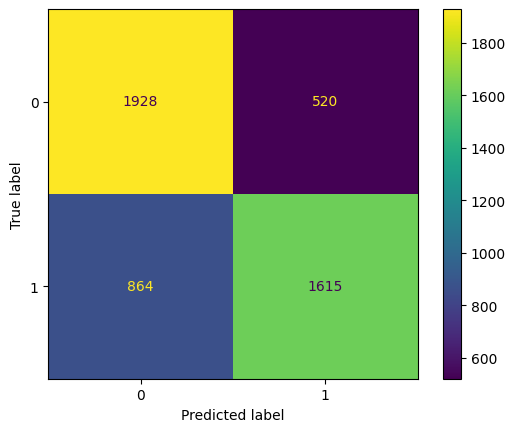

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=2)

# Training the classifier
knn.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_prob_knn)
mcc = matthews_corrcoef(y_test, y_pred_knn)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (fp / tp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.6689669169880251
Precision: 0.8126843657817109
Recall: 0.4445340863251311
F1 Score: 0.5747066492829205
MCC: 0.38149433616012446
FPR: 0.10375816993464053
FNR: 0.5554659136748689
NLR (%): 61.97723594694982
PLR (%): 23.049001814882033
Confusion Matrix:
 [[2194  254]
 [1377 1102]]


#  XGBClassifier

Accuracy: 0.700020296326365
Precision: 0.7213622291021672
Recall: 0.6579265832997176
F1 Score: 0.6881856540084388
MCC: 0.4019258932172272
FPR: 0.25735294117647056
FNR: 0.34207341670028235
NLR (%): 46.06137096162218
PLR (%): 258.8888888888889
Confusion Matrix:
 [[1818  630]
 [ 848 1631]]


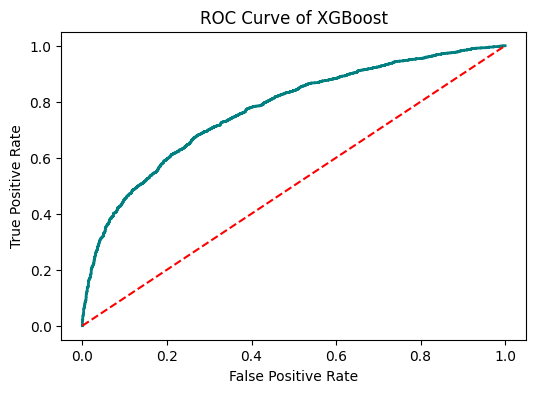

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
mcc = matthews_corrcoef(y_test, y_pred_xgb)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


Using Yeo-Jhonson Transformation for model fitting


In [35]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Define columns with significant outliers
outlier_cols = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']

# Applying Yeo-Johnson Transformation
yeo_johnson = PowerTransformer(method='yeo-johnson')
X_over[outlier_cols] = yeo_johnson.fit_transform(X_over[outlier_cols])

# Quantile Transformation to map features to a normal distribution
quantile_transformer = QuantileTransformer(output_distribution='normal')
X_over[outlier_cols] = quantile_transformer.fit_transform(X_over[outlier_cols])


# RandomForestClassifier

Accuracy: 0.7696366957580678
Precision: 0.7997323818019625
Recall: 0.7232755143202905
F1 Score: 0.7595848337216692
MCC: 0.5420452697033037
FPR: 0.18341503267973855
FNR: 0.2767244856797096
NLR (%): 33.88802105772532
PLR (%): 399.33184855233856
Confusion Matrix:
 [[1999  449]
 [ 686 1793]]


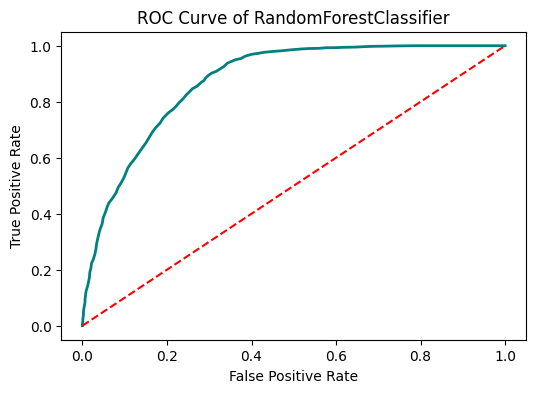

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# LogisticRegression


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Create the logistic regression classifier object
classifier = LogisticRegression(random_state=0)

# Train the model using the training sets
classifier.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred_lr = classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
mcc = matthews_corrcoef(y_test, y_pred_lr)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR)
nlr = fnr / (1 - fpr)

# Calculate Positive Likelihood Ratio (PLR)
plr = tp / fp

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR:', nlr)
print('PLR:', plr)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.6486705906230972
Precision: 0.6423135464231354
Recall: 0.6809197256958451
F1 Score: 0.6610534560407284
MCC: 0.29759112425821216
FPR: 0.3839869281045752
FNR: 0.3190802743041549
NLR: 0.5179764665096626
PLR: 1.7957446808510638
Confusion Matrix:
 [[1508  940]
 [ 791 1688]]


#GaussianNB

Accuracy: 0.6358839050131926
Precision: 0.6221905101676775
Recall: 0.7035094796288827
F1 Score: 0.6603559257856872
MCC: 0.2735158575898363
FPR: 0.4325980392156863
FNR: 0.2964905203711174
NLR (%): 52.25405283430492
PLR (%): 164.6836638338055
Confusion Matrix:
 [[1389 1059]
 [ 735 1744]]


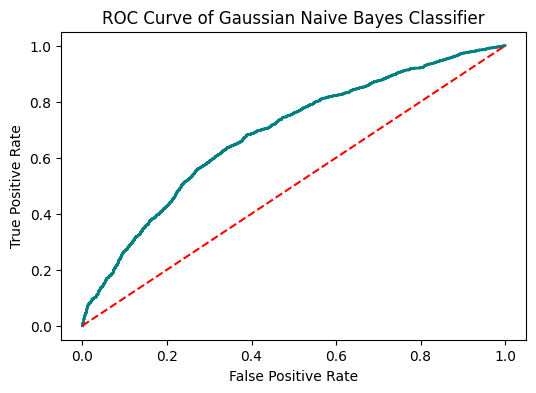

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the Naive Bayes classifier object
nb_clf = GaussianNB()

# Train the model using the training sets
nb_clf.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred_nb = nb_clf.predict(X_test)
y_pred_prob_nb = nb_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
mcc = matthews_corrcoef(y_test, y_pred_nb)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


#RidgeClassifier

Confusion Matrix:
 [[1489  959]
 [ 777 1702]]
Accuracy: 0.6476557743048508
ROC AUC Score: 0.6993910613862326
Precision: 0.639609169485156
Recall: 0.6865671641791045
F1 Score: 0.6622568093385214
MCC: 0.2957649809457215
FPR: 0.3917483660130719
FNR: 0.31343283582089554
NLR (%): 51.53012639956697
PLR (%): 177.47653806047967


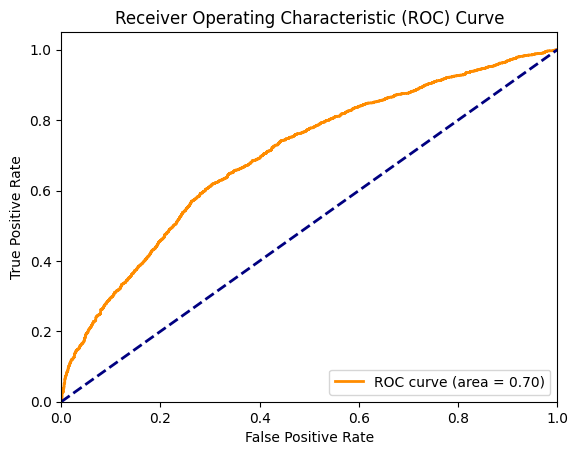

In [31]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the classifier object
ridge_clf = RidgeClassifier()

# Training the classifier
ridge_clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_ridge = ridge_clf.predict(X_test)

# Ridge classifier does not output probabilities directly, so we cannot compute roc_auc_score directly.
# But we can use decision_function to get confidence scores and then use these scores to compute roc_auc_score.
y_pred_prob_ridge = ridge_clf.decision_function(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ridge)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ridge)
precision = precision_score(y_test, y_pred_ridge)
recall = recall_score(y_test, y_pred_ridge)
f1 = f1_score(y_test, y_pred_ridge)
mcc = matthews_corrcoef(y_test, y_pred_ridge)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_ridge))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ridge)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# ExtraTreesClassifier

Confusion Matrix:
 [[1883  565]
 [ 525 1954]]
Accuracy: 0.7787700426222853
ROC AUC Score: 0.8782438331659139
Precision: 0.7757046447002779
Recall: 0.7882210568777733
F1 Score: 0.7819127651060425
MCC: 0.5575508808139753
FPR: 0.23080065359477125
FNR: 0.2117789431222267
NLR (%): 27.532387294912958
PLR (%): 345.84070796460173


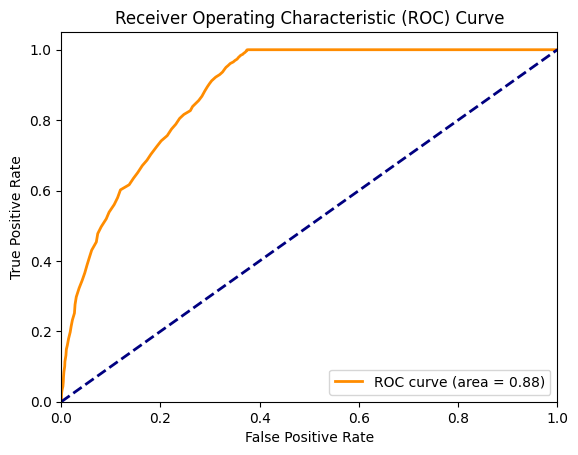

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the classifier object
extra_trees = ExtraTreesClassifier()

# Training the classifier
extra_trees.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_extra_trees = extra_trees.predict(X_test)
y_pred_prob_extra_trees = extra_trees.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_extra_trees)
precision = precision_score(y_test, y_pred_extra_trees)
recall = recall_score(y_test, y_pred_extra_trees)
f1 = f1_score(y_test, y_pred_extra_trees)
mcc = matthews_corrcoef(y_test, y_pred_extra_trees)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_extra_trees))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_extra_trees)
roc_auc = roc_auc_score(y_test, y_pred_prob_extra_trees)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Conclusion

This Python script focuses on building and evaluating various machine learning models for predicting maintainence and  engine condition based on provided engine data.

**Key Steps:**

1. **Data Preprocessing:** The script performs data preprocessing including random oversampling to handle class imbalance, feature scaling using RobustScaler and StandardScaler, and outlier treatment using Yeo-Johnson and Quantile transformations.
2. **Model Training & Evaluation:** It trains several classification models including Decision Tree, KNN, XGBoost, Random Forest, Logistic Regression, GaussianNB, RidgeClassifier and ExtraTreesClassifier.
3. **Performance Metrics:** Performance evaluation is done using various metrics like accuracy, precision, recall, F1 score, MCC, FPR, FNR, NLR, PLR, and ROC AUC.
4. **Visualization:** Confusion matrices and ROC curves are plotted to visualize the model performance and aid in the interpretation of the results.

**Potential Insights:**
The script allows comparing the performance of different classification models on the engine dataset after various preprocessing steps. This provides insights into which model is best suited for predicting engine condition based on the specific dataset and its characteristics. The visualizations like ROC curves and confusion matrices give further understanding of the models' predictive capabilities and potential biases.

- The data is highly biased so its hard to transform the model for peak accuracy even though the biased data the model achieved a good accuracy but not the best it  need much time for making the optimized model this can be done in the further development.


**Further Development:**
* **Hyperparameter Tuning:** It could be further improved by incorporating hyperparameter  tuning techniques for each of the models.
* **Feature Engineering:** Creating new features from existing ones might enhance model performance.
* **Deep Learning Models:** Explore using deep learning models like neural networks for potentially achieving better accuracy.
* **Deployment:** Once a satisfactory model is developed, it could be deployed for real-time engine condition monitoring.

